# Importing Libraries

In [1]:
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd # Data analysis and manipultion tool
import matplotlib.pyplot as plt
import seaborn as sns
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [2]:
# In read_csv() function, we have passed the location to where the files are located in the dphi official github page.
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/hippocorpus/train_set_label.csv" )

# EDA

In [3]:
train_data.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,openness,recAgnPairId,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent,memType
0,39DD6S19JQXBBJGPFEBWSF4G1TQEZJ,1025,YGROBIBW,35.0,Man,white,one,3.0,2.0,3.0,...,0.375,3RKNTXVS3NKSI9BOEGJK201G4H2A46,NaN,NaN,NaN,We were friends from high school. I got a call...,3.0,my friend's death. Old friends reunited to sha...,60.0,retold
1,3WQQ9FUS6BGYKK3IWX9TEN1R8RLB87,1987,KK89LEHY,35.0,woman,indian,one,5.0,3.0,5.0,...,0.625,NaN,3WQQ9FUS6BGYKK3IWX9TEN1R8RLB87,NaN,NaN,"Five months ago, my father passed away from a ...",2.0,"My dad, who was a significant person in my lif...",150.0,recalled
2,3YDTZAI2WY2WOLYOIXQRRZ8DKXB14S,1604,JIWFAU5T,35.0,man,White,one,one,5.0,5.0,...,1.000,NaN,3YDTZAI2WY2WOLYOIXQRRZ8DKXB14S,NaN,NaN,My Most Memorable Day of My Life! I found my o...,1.0,The best thing may be difficult to find. I was...,120.0,recalled
3,3Q8GYXHFEQOY77CMCZYLDNXJ2YBC58,6369,1NHCDDOJ,40.0,woman,white,one,one,NaN,4.0,...,0.875,NaN,3WLEIWSYHP3XPI4FG8AOQ7RM04VH26,1.0,"This was not at all how I got engaged, but a w...",It has been such a whirlwind these past 8 mont...,1.0,The event described details my wedding which o...,240.0,imagined
4,32AT8R96GMVVZ3RXAMWT04TG9CISU0,1083,A5SWJWSQ,30.0,MAN,white,one,5.0,3.0,5.0,...,1.000,NaN,32AT8R96GMVVZ3RXAMWT04TG9CISU0,NaN,NaN,Today was one of the saddest days of my life. ...,4.0,My cousin recently passed away due to brain ca...,60.0,recalled


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6797 entries, 0 to 6796
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AssignmentId       6797 non-null   object 
 1   WorkTimeInSeconds  6797 non-null   int64  
 2   WorkerId           6797 non-null   object 
 3   annotatorAge       6771 non-null   float64
 4   annotatorGender    6793 non-null   object 
 5   annotatorRace      6797 non-null   object 
 6   distracted         6797 non-null   object 
 7   draining           6797 non-null   object 
 8   frequency          4052 non-null   float64
 9   importance         6649 non-null   float64
 10  logTimeSinceEvent  6797 non-null   float64
 11  mainEvent          6797 non-null   object 
 12  mostSurprising     6797 non-null   object 
 13  openness           6797 non-null   float64
 14  recAgnPairId       2549 non-null   object 
 15  recImgPairId       5303 non-null   object 
 16  similarity         2745 

Text(0.5, 1.0, 'Dependent Variable Counts')

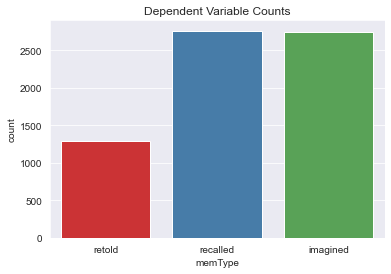

In [5]:
sns.set_style("darkgrid")
sns.countplot(x='memType',data=train_data,palette="Set1")
plt.title("Dependent Variable Counts")

Text(0.5, 1.0, 'Count of Gender')

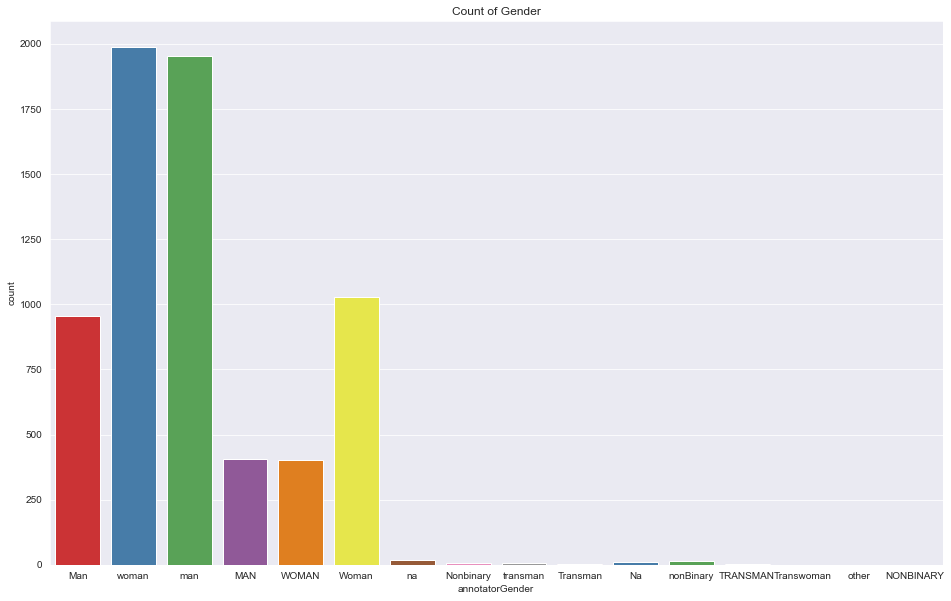

In [6]:
plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.countplot(x='annotatorGender',data=train_data,palette="Set1")
plt.title("Count of Gender")

Text(0.5, 1.0, 'Count of Race')

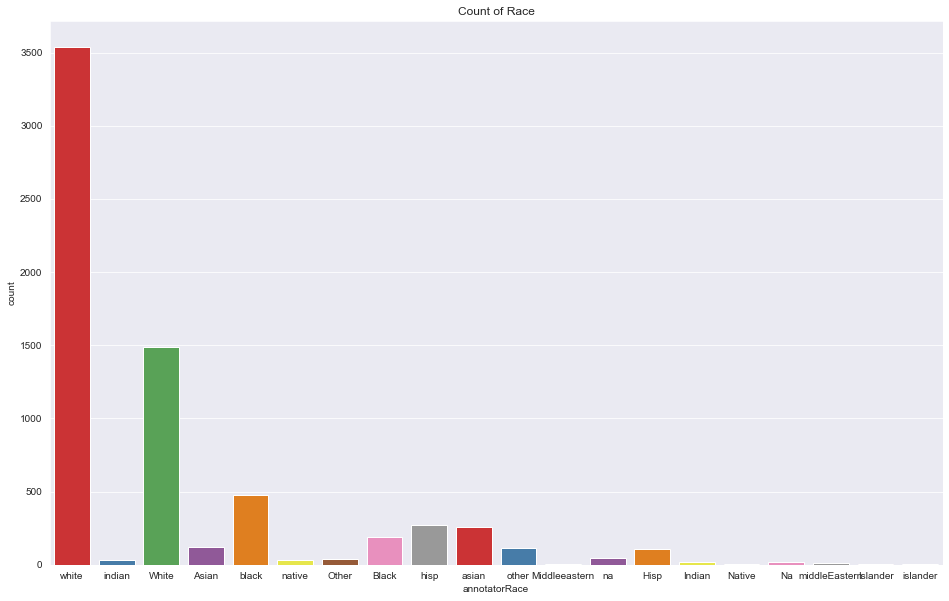

In [7]:
plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.countplot(x='annotatorRace',data=train_data,palette="Set1")
plt.title("Count of Race")

# Separating Input Features and Output Features

In [8]:
# Input/independent variables
X = train_data.drop('memType', axis = 1) # her we are droping the memType feature as this is the target and 'X' is input features, the changes are not
# made inplace as we have not used 'inplace = True'

y = train_data['memType'] # Output/Dependent variable

### Dropping Unnccessary Columns

In [ ]:
X = X.drop(['recAgnPairId','recImgPairId','similarityReason','story','WorkerId','AssignmentId','summary',
            'annotatorRace','mainEvent','mostSurprising'],axis = 1)

## Encoding Gender

In [ ]:
X.annotatorGender.unique()

In [ ]:
Gender = X.annotatorGender

In [ ]:
Gender_final = []
def encode_gen():
    for item in Gender:
        if item == 'Man' or item == 'man' or item == 'MAN':
            Gender_final.append(0)
        elif item == 'woman' or item == 'WOMAN' or item == 'Woman':
            Gender_final.append(1)
        else:
            Gender_final.append(2)
    

In [ ]:
X.drop('annotatorGender',axis = 1, inplace = True)

In [ ]:
X['Gender'] = Gender_final

## Encoding Distracted

In [ ]:
X.distracted.unique()

In [ ]:
distracted_text = X.distracted

In [ ]:
distarcted_final = []
for item in distracted_text:
    if item == 'one':
        distarcted_final.append(1)
    elif item == '2.0':
        distarcted_final.append(2)
    elif item == '3.0':
        distarcted_final.append(3)
    elif item == '4.0':
        distarcted_final.append(4)        
    else:
        distarcted_final.append(5)

In [ ]:
X.drop('distracted',axis = 1, inplace = True)

In [ ]:
X['distracted_num']  = distarcted_final

## Encoding Draining

In [ ]:
X.draining.unique()

In [ ]:
draining_text = X.draining

In [ ]:
draining_final = []
for item in draining_text:
    if item == 'one':
        draining_final.append(1)
    elif item == '2.0':
        draining_final.append(2)
    elif item == '3.0':
        draining_final.append(3)
    elif item == '4.0':
        draining_final.append(4)        
    else:
        draining_final.append(5)

In [ ]:
X.drop('draining',axis = 1, inplace = True)

In [ ]:
X['draining']  = draining_final

## Encoding memType

In [11]:
train_data.memType.unique()

array(['retold', 'recalled', 'imagined'], dtype=object)

In [ ]:
y

In [9]:
y_enc = []
for item in y:
    if item == 'recalled':
        y_enc.append(0)
    elif item == 'imagined':
        y_enc.append(1)
    else:
        y_enc.append(2)

In [10]:
y = np.array(y_enc)

# Splitting Data into Train and Validation

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state = 42)

## Checking Null Values

In [ ]:
X_train.isnull().sum()

### Filling Null Values

In [ ]:
X_train.annotatorAge.fillna(X_train.annotatorAge.mean(), inplace=True)
X_train.importance.fillna(X_train.importance.mean(), inplace=True)
X_train.frequency.fillna(X_train.frequency.mean(), inplace=True)
X_train.similarity.fillna(X_train.similarity.mean(), inplace=True)

X_val.annotatorAge.fillna(X_val.annotatorAge.mean(), inplace=True)
X_val.importance.fillna(X_val.importance.mean(), inplace=True)
X_val.frequency.fillna(X_val.frequency.mean(), inplace=True)
X_val.similarity.fillna(X_val.similarity.mean(), inplace=True)

## Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.fit_transform(X_val)

# Building Model

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

## Random Forest Classifer with Grid Search CV 

In [ ]:
params = {"max_depth": [25,30,35],
               "min_samples_split": [3, 4, 5],
              "min_samples_leaf": [1 ,2,3],
              "bootstrap": [True],
              "n_estimators": [150,175,125],
                 "n_jobs": [-1],
             "verbose": [2],
            "criterion": ["entropy"]
         }

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc1 = RandomForestClassifier()
clf = GridSearchCV(rfc1, params,cv = 4)
clf.fit(X_train,y_train)

In [ ]:
print("The best estimator for random forest classifier is:", clf.best_estimator_)

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

# Validate the Model

In [ ]:
#For Logistic Regression
pred_lr = lr.predict(X_val)

In [ ]:
#For Random Forest Classifier
pred_rfc = rfc.predict(X_val)

In [ ]:
#For Random Forest Classifer with Grid Search CV
pred_clf = clf.predict(X_val)

In [ ]:
#For Gradient Boosting Classifier
pred_gbc = gbc.predict(X_val)

# Model Evaluation

In [ ]:
# import mean squared error from sklearn.metric
from sklearn.metrics import f1_score

In [ ]:
print('F1 Score for logistic regression is: ', f1_score(y_val, pred_lr, average = 'weighted'))
print('F1 Score for random forest classifier is: ', f1_score(y_val, pred_rfc, average = 'weighted'))
print('F1 Score for random forest classifier with grid search cv is: ', f1_score(y_val, pred_clf, average = 'weighted'))
print('F1 Score for gradient boosting classifier is: ', f1_score(y_val, pred_gbc, average = 'weighted'))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=1000, random_state=0,learning_rate=0.06)
ada.fit(X_train, y_train)

In [ ]:
test_pred_ada = ada.predict(X_val)
train_pred_ada = ada.predict(X_train)

In [ ]:
#print('F1 Score for logistic regression is: ', f1_score(y_val, test_pred_ada, average = 'weighted'))
#print('F1 Score for logistic regression is: ', f1_score(y_train, train_pred_ada, average = 'weighted'))
#learning_rate=0.05

In [ ]:
print('F1 Score for logistic regression is: ', f1_score(y_val, test_pred_ada, average = 'weighted'))
print('F1 Score for logistic regression is: ', f1_score(y_train, train_pred_ada, average = 'weighted'))

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier(n_estimators=1000, max_depth=None,
     min_samples_split=2, random_state=0)
ext.fit(X_train,y_train)

In [ ]:
test_pred_ext = ext.predict(X_val)
train_pred_ext = ext.predict(X_train)

In [ ]:
print('F1 Score for logistic regression is: ', f1_score(y_val, test_pred_ext, average = 'weighted'))
print('F1 Score for logistic regression is: ', f1_score(y_train, train_pred_ext, average = 'weighted'))

# Loading Test Data

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/hippocorpus/test_set_label.csv')

# Test Data EDA

In [ ]:
test_data.info()

### Dropping Unneccessary coloumns

In [ ]:
test_data = test_data.drop(['recAgnPairId','recImgPairId','similarityReason','story','WorkerId','AssignmentId','summary',
            'annotatorRace','mainEvent','mostSurprising'],axis = 1)

### Encoding Gender

In [ ]:
test_data.annotatorGender.unique()

In [ ]:
test_Gender = test_data.annotatorGender

In [ ]:
test_Gender_final = []
for item in test_Gender:
    if item == 'Man' or item == 'man' or item == 'MAN':
        test_Gender_final.append(0)
    elif item == 'woman' or item == 'WOMAN' or item == 'Woman':
        test_Gender_final.append(1)
    else:
        test_Gender_final.append(2)

In [ ]:
test_data.drop('annotatorGender',axis = 1, inplace = True)

In [ ]:
test_data['Gender'] = test_Gender_final

### Encoding Distracted

In [ ]:
test_data.distracted.unique()

In [ ]:
test_distracted_text = test_data.distracted

In [ ]:
test_distarcted_final = []
for item in test_distracted_text:
    if item == 'one':
        test_distarcted_final.append(1)
    elif item == '2.0':
        test_distarcted_final.append(2)
    elif item == '3.0':
        test_distarcted_final.append(3)
    elif item == '4.0':
        test_distarcted_final.append(4)        
    else:
        test_distarcted_final.append(5)

In [ ]:
test_data.drop('distracted',axis = 1, inplace = True)

In [ ]:
test_data['distracted_num']  = test_distarcted_final

### Encoding Draining

In [ ]:
test_data.draining.unique()

In [ ]:
test_draining_text = test_data.draining

In [ ]:
test_draining_final = []
for item in test_draining_text:
    if item == 'one':
        test_draining_final.append(1)
    elif item == '2.0':
        test_draining_final.append(2)
    elif item == '3.0':
        test_draining_final.append(3)
    elif item == '4.0':
        test_draining_final.append(4)        
    else:
        test_draining_final.append(5)

In [ ]:
test_data.drop('draining',axis = 1, inplace = True)

In [ ]:
test_data['draining']  = test_draining_final

### Checking Null Values

In [ ]:
test_data.isnull().sum()

### Filling Null Values

In [ ]:
test_data.annotatorAge.fillna(test_data.annotatorAge.mean(), inplace=True)
test_data.importance.fillna(test_data.importance.mean(), inplace=True)
test_data.frequency.fillna(test_data.frequency.mean(), inplace=True)
test_data.similarity.fillna(test_data.similarity.mean(), inplace=True)

### Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
test_data = ss.fit_transform(test_data)

In [ ]:
test_data = ss.fit_transform(test_data)

# Test Data Predict

In [ ]:
target = ext.predict(test_data)

In [ ]:
target_obj = []
for item in target:
    if item == 0:
        target_obj.append("recalled")
    elif item == 1:
        target_obj.append("imagined")
    else:
        target_obj.append("retold")

target = np.array(target_obj)

# Saving Results in CSV

In [ ]:
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]
res.to_csv("submission.csv",index =False) # the csv file will be saved locally on the same location where this notebook is located.